In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
filepath = "crypto_data.csv"
rawdata = pd.read_csv(filepath)

In [3]:
#cleaning and formatting data as instructed
edit_data = rawdata.loc[rawdata['IsTrading'] == True]
edit_data = edit_data.drop(["IsTrading"], axis=1)
edit_data = edit_data.dropna()
data = edit_data.loc[edit_data['TotalCoinsMined'] > 0]
data = data.drop(['CoinName'], axis = 1)
data = pd.get_dummies(data)
# print(data)

#standardizing data 
scaler = StandardScaler()
standard = scaler.fit_transform(data)
# standard

In [4]:
# Initialize PCA model
pca = PCA(n_components=0.90)

# Get components for the data.
crypto_pca = pca.fit_transform(standard)

In [5]:
# Run t-SNE
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(crypto_pca)

# Check that dimensions have been reduced to two
tsne_features.shape

(532, 2)

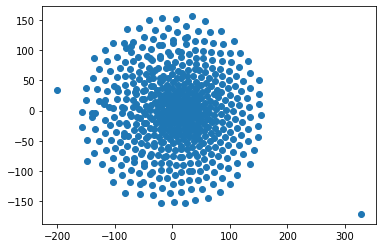

In [6]:
# Plot the results via t-SNE
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [7]:
#KMeans - determining inertia
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,4804361.500
1,2,3216687.250
2,3,2196032.250
3,4,1720828.125
4,5,1390445.000


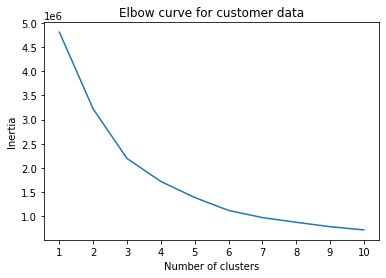

In [8]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()